Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [1]:
# Load Packages
#!pip install requests
import requests
import json
import re
#!pip install pandas
import pandas as pd
import os # use this to access your environment variables
#!pip install plotly
import plotly.express as px
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install scipy
from scipy.stats import ttest_ind
import sqlite3
#!pip install nbformat --upgrade

In [2]:
# Joining of dataframes has been done post competing EDA for each of the dataframes. Hence, the sections have been shuffled

fs_df = pd.read_csv(r'C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\data\Foursquare_Data_17th.csv')
yelp_df = pd.read_csv(r'C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\data\Yelp_Data_17th.csv')
city_bike_df = pd.read_csv(r'C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\data\City_Bike_Vancouver_Data_17th.csv')


In [3]:
# Data Audit and cleaning for City Bike dataframe
city_bike_df.head()
city_bike_df.shape # 248,13
city_bike_df.info() # No need to change data types
city_bike_df.describe(include = 'all')


# Column wise EDA and data cleaning
# ID can be dropped, since it's repetitive and was created for joining purposes
# City and Country will be same for all the records hence it can be left as it is
# Station Id - just a unique identifier for the station, can be left as it is
# Station name - 
    # Scope for text cleaning
    # Check distribution of values and see if there are some repetitive names
    # Create geographical map of stations using the latitude and longitude for showing a density plot 
# Time stamp - It will be same for all, extract and retain the date in a cleaner format as per Vancouver timezone
# For the remaining columns check the distribution and if anomalies are present (can be correlated with the time and day of api call for example all bikes shall be available at odd hours and so)

# Other plots to be created post joining and additional columns to be created
# Correlation heatmap to establish hypothesis
# Popularity index of a station - with reference to review count, ratings and number of POIs
# Correlation between popularity index and cycle renting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            248 non-null    int64  
 1   City                          248 non-null    object 
 2   Country                       248 non-null    object 
 3   Station_Id                    248 non-null    object 
 4   Station_Name                  248 non-null    object 
 5   Latitude                      248 non-null    float64
 6   Longitude                     248 non-null    float64
 7   Timestamp                     248 non-null    object 
 8   Total_Available_Slots         248 non-null    int64  
 9   Total_Available_Free_Bikes    248 non-null    int64  
 10  Total_Available_EBikes        248 non-null    int64  
 11  Total_Available_Normal_Bikes  248 non-null    int64  
 12  Total_Available_Empty_Slots   248 non-null    int64  
dtypes: fl

,id,City,Country,Station_Id,Station_Name,Latitude,Longitude,Timestamp,Total_Available_Slots,Total_Available_Free_Bikes,Total_Available_EBikes,Total_Available_Normal_Bikes,Total_Available_Empty_Slots
count,248.0,248,248,248,248,248.000000,248.000000,248,248.000000,248.000000,248.000000,248.000000,248.000000
unique,NaN,1,1,248,248,NaN,NaN,238,NaN,NaN,NaN,NaN,NaN
top,NaN,Vancouver,CA,7a19c49f486d7c0c02b3685d7b240448,10th & Cambie,NaN,NaN,2023-12-17T22:12:48.997000Z,NaN,NaN,NaN,NaN,NaN
freq,NaN,248,248,1,1,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
mean,1.0,NaN,NaN,NaN,NaN,49.271782,-123.119346,NaN,18.810484,8.524194,1.834677,6.689516,9.967742
std,0.0,NaN,NaN,NaN,NaN,0.011709,0.032818,NaN,5.384824,5.931408,2.367306,5.456895,5.180836
min,1.0,NaN,NaN,NaN,NaN,49.238105,-123.252261,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,NaN,NaN,NaN,NaN,49.263484,-123.138182,NaN,15.750000,4.000000,0.000000,2.000000,6.000000
50%,1.0,NaN,NaN,NaN,NaN,49.271063,-123.118073,NaN,18.000000,8.000000,1.000000,6.000000,10.000000
75%,1.0,NaN,NaN,NaN,NaN,49.280662,-123.099747,NaN,20.000000,12.250000,3.000000,10.000000,13.000000


In [4]:
city_bike_df = city_bike_df.drop('id', axis=1)

In [5]:
# Check Names for DQ issues
city_bike_df.Station_Name.value_counts() 
# all have a count of one which means no 2 stations ids have the same name 

sum(city_bike_df['Station_Name'].isnull() | city_bike_df['Station_Name'] == '')
# No junk values found in the distribution like Null, NAN, Blanks, 0 etc

# Text cleaning 
import re

def process_location_string(location_string):
    # Use regex to find the brackets and their content
    match = re.search(r'^(.*?)\(([^)]*)\)(.*)$', location_string)

    if match:
        # Extract parts of the string before, between, and after brackets
        before_brackets = match.group(1)
        brackets_content = match.group(2)
        after_brackets = match.group(3)

        # Add "near" before the brackets and remove brackets
        new_location_string = f"{before_brackets}near {brackets_content}{after_brackets}"

        return new_location_string

    # Return the original string if no match is found
    return location_string

city_bike_df['Station_Name'] = city_bike_df['Station_Name'].apply(process_location_string)

In [7]:
# Visualize the bike stations in a geo map

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(city_bike_df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Station_Name", 
                        hover_data=["Station_Name", "Total_Available_Free_Bikes"],
                        color="Total_Available_Free_Bikes",
                        color_continuous_scale=color_scale,
                        size="Total_Available_Free_Bikes",
                        zoom=8, 
                        height=600,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
# Majority of the stations are in the downtown area

# Save the figure as an HTML file
fig.write_html(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\city_bike_map_chart.html")

In [11]:
# Extract Date and Time

city_bike_df['Timestamp'].value_counts() # Millisconds were not in consistent format for 1 record in the timestamp object

import pytz

# Function to convert UTC to Vancouver time
def convert_to_vancouver(timestamp):
    utc_datetime = pd.to_datetime(timestamp, errors='coerce')
    if not pd.isnull(utc_datetime):
        vancouver_timezone = pytz.timezone("America/Vancouver")
        vancouver_datetime = utc_datetime.replace(tzinfo=pytz.utc).astimezone(vancouver_timezone)
        vancouver_timestamp = vancouver_datetime.strftime("%Y-%m-%d %H:%M:%S.%f")[:-3] + "Z"
        return vancouver_timestamp
    return None

# Apply the conversion function to the 'Timestamp' column
city_bike_df['Date_Time'] = city_bike_df['Timestamp'].apply(convert_to_vancouver)


# Extract date and time components
city_bike_df['Date'] = pd.to_datetime(city_bike_df['Date_Time']).dt.date
city_bike_df['Time'] = pd.to_datetime(city_bike_df['Date_Time']).dt.time

city_bike_df.drop(['Timestamp'], axis = 1, inplace = True)
city_bike_df.head()

,City,Country,Station_Id,Station_Name,Latitude,Longitude,Total_Available_Slots,Total_Available_Free_Bikes,Total_Available_EBikes,Total_Available_Normal_Bikes,Total_Available_Empty_Slots,Date_Time,Date,Time
0,Vancouver,CA,7a19c49f486d7c0c02b3685d7b240448,10th & Cambie,49.262487,-123.114397,36,29,1,28,5,2023-12-17 14:12:48.876Z,2023-12-17,14:12:48.876000
1,Vancouver,CA,32603a87cfca71d0f7dfa3513bad69d5,Yaletown-Roundhouse Station,49.274566,-123.121817,16,12,4,8,4,2023-12-17 14:12:48.865Z,2023-12-17,14:12:48.865000
2,Vancouver,CA,6d42fa40360f9a6b2bf641c7b8bb2862,Dunsmuir & Beatty,49.279764,-123.110154,26,18,3,15,8,2023-12-17 14:12:48.866Z,2023-12-17,14:12:48.866000
3,Vancouver,CA,66f873d641d448bd1572ab086665a458,12th & Yukon near City Hall,49.260599,-123.113504,16,8,5,3,8,2023-12-17 14:12:48.867Z,2023-12-17,14:12:48.867000
4,Vancouver,CA,485d4d24c803cfde829ab89699fed833,8th & Ash,49.264215,-123.117772,16,11,7,4,4,2023-12-17 14:12:48.886Z,2023-12-17,14:12:48.886000


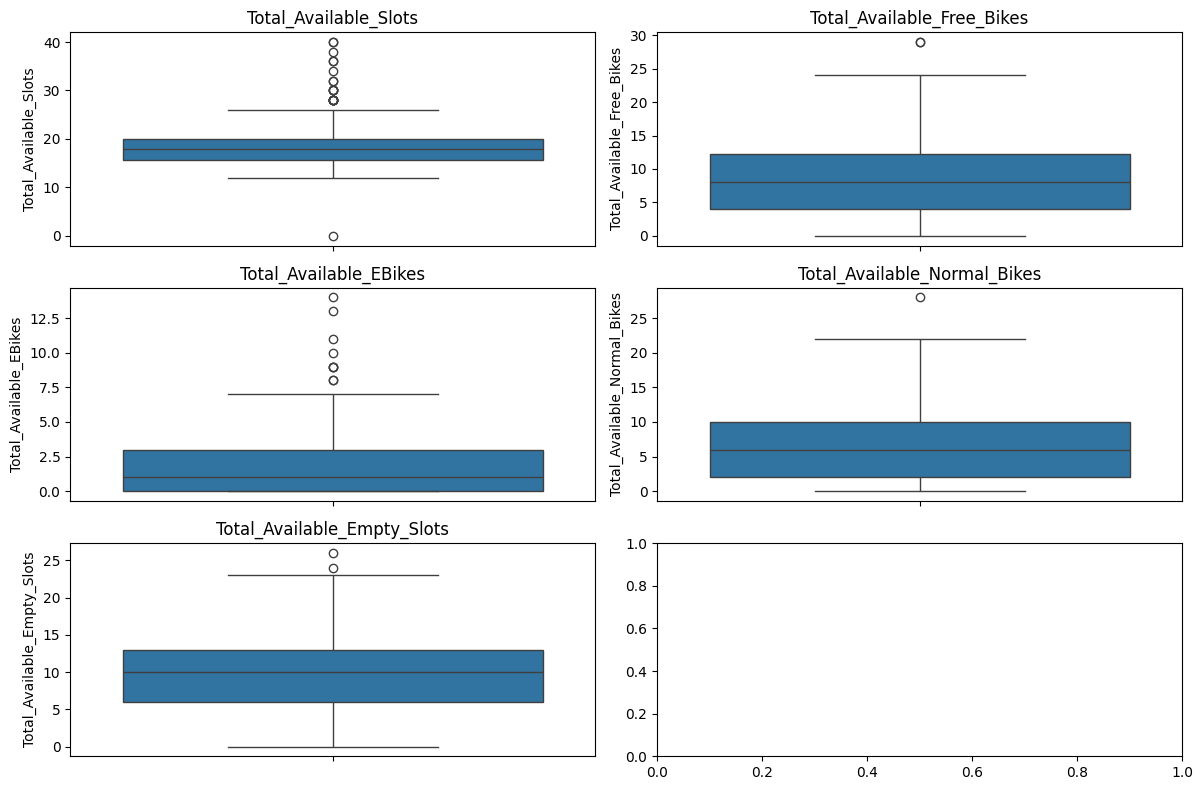

In [18]:
# Lastly we will check for anomalies in the bike and slots data using boxplots and study their distributions

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Example boxplots for different columns
sns.boxplot(y='Total_Available_Slots', data=city_bike_df, ax=axes[0])
axes[0].set_title('Total_Available_Slots')

sns.boxplot(y='Total_Available_Free_Bikes', data=city_bike_df, ax=axes[1])
axes[1].set_title('Total_Available_Free_Bikes')

sns.boxplot(y='Total_Available_EBikes', data=city_bike_df, ax=axes[2])
axes[2].set_title('Total_Available_EBikes')

sns.boxplot(y='Total_Available_Normal_Bikes', data=city_bike_df, ax=axes[3])
axes[3].set_title('Total_Available_Normal_Bikes')

sns.boxplot(y='Total_Available_Empty_Slots', data=city_bike_df, ax=axes[4])
axes[4].set_title('Total_Available_Empty_Slots')

# Adjust layout
plt.tight_layout()

plt.savefig(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\city_bike_boxplots.png")

# Show the plots
plt.show()


# Following columns have anomalies - Total_Available_Slots, Total_Available_Free_Bikes, Total_Available_EBikes, Total_Available_Normal_Bikes
# Skewness - All the boxplots are right skewed
# If there had been any missing values then we could not have used mean to impute the same

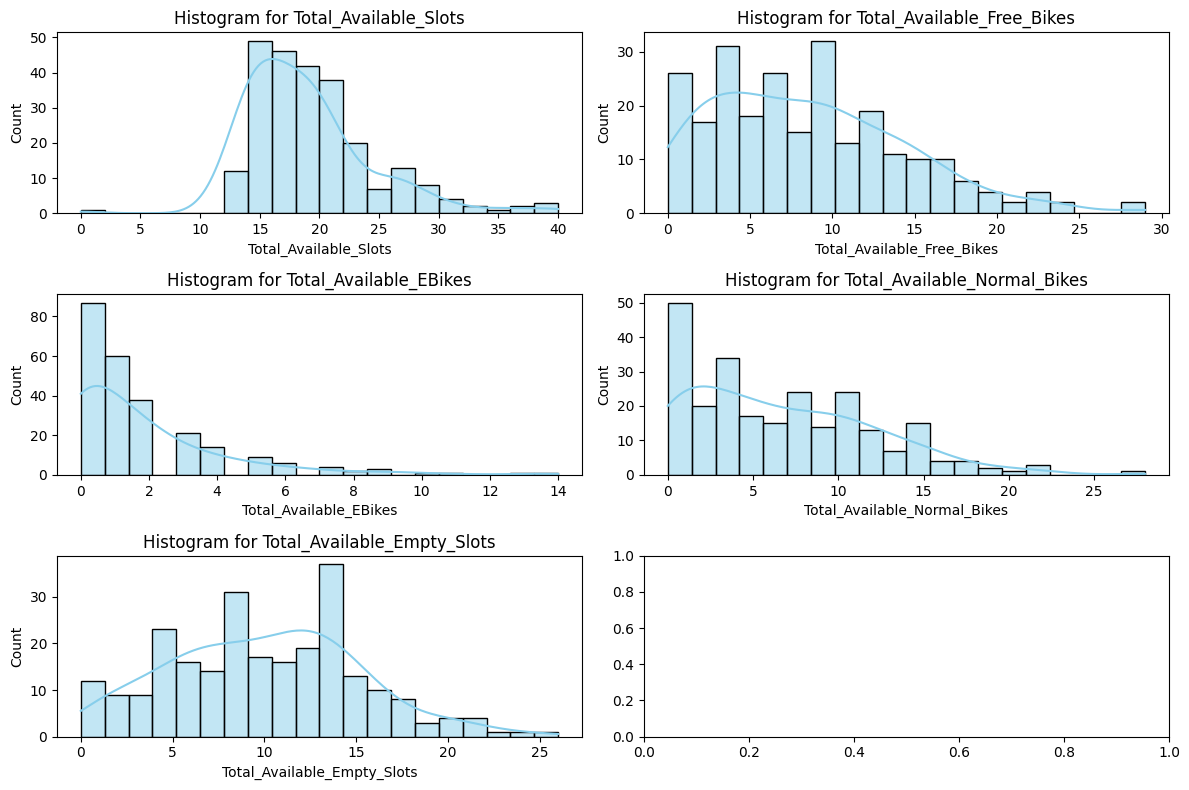

In [17]:

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Example histograms with a line for different columns
columns = ['Total_Available_Slots','Total_Available_Free_Bikes','Total_Available_EBikes',
'Total_Available_Normal_Bikes','Total_Available_Empty_Slots']

for i, column in enumerate(columns):
    sns.histplot(city_bike_df[column].dropna(), kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Histogram for {column}')

# Adjust layout
plt.tight_layout()

plt.savefig(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\city_bike_histograms.png")

# Show the plots
plt.show()

In [19]:
# Top 5 stations with the most number of bikes in use
city_bike_df.head()
city_bike_df['Total_Bikes_In_Use'] = city_bike_df['Total_Available_Slots'] - city_bike_df['Total_Available_Free_Bikes']
city_bike_df.iloc[city_bike_df['Total_Bikes_In_Use'].value_counts().head(5).index]['Station_Name']

13       Hornby & Pender
8           Canada Place
12       Robson & Hornby
11    Marinaside & Davie
6         Stamps Landing
Name: Station_Name, dtype: object

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [20]:
# Join the dataframes

print(city_bike_df.shape)
print(yelp_df.shape)
print(fs_df.shape)

# Check column names and data types

print(city_bike_df.info())
print(yelp_df.info())
print(fs_df.info()) # Lat and Long are in float

# Check for overalpping records

print(sum(yelp_df.Latitude.isin(city_bike_df.Latitude)))
print(sum(yelp_df.Longitude.isin(city_bike_df.Longitude)))

print(sum(fs_df.Latitude.isin(city_bike_df.Latitude)))
print(sum(fs_df.Longitude.isin(city_bike_df.Longitude)))

complete_df = pd.merge(city_bike_df, yelp_df, on = ['Latitude', 'Longitude'], how = 'left')
print(complete_df.shape)
complete_df = pd.merge(complete_df, fs_df, on = ['Latitude', 'Longitude'], how = 'left')
print(complete_df.shape)

(248, 15)
(247, 8)
(247, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          248 non-null    object 
 1   Country                       248 non-null    object 
 2   Station_Id                    248 non-null    object 
 3   Station_Name                  248 non-null    object 
 4   Latitude                      248 non-null    float64
 5   Longitude                     248 non-null    float64
 6   Total_Available_Slots         248 non-null    int64  
 7   Total_Available_Free_Bikes    248 non-null    int64  
 8   Total_Available_EBikes        248 non-null    int64  
 9   Total_Available_Normal_Bikes  248 non-null    int64  
 10  Total_Available_Empty_Slots   248 non-null    int64  
 11  Date_Time                     248 non-null    object 
 12  Date                          248 no

In [21]:
# EDA Part Continued post joining the dataframes

# Data cleaning and EDA steps
# Drop id_dummy column
# Rename Yelp columns and FS columns for easier bifurcation
# Check distribution and anomalies in newly added columns
# Impute NA values
# Create new columns - Total Number of FSQ POIs, Avg number of POI in a place, Popularity index of a place (3 buckets as per the count of POIs)
# Geo map of POI per staion
# Check for correlation between following parameters -
    # Total Slots and Total POIs
    # Total Bikes in Use and Total POIs
    # Total Bikes in Use and Total number of reviews
    # Total Bikes in Use and Avg Ratings

complete_df.drop('id_dummy', axis = 1, inplace = True)

column_mapping = {'Total_POI': 'Yelp_Total_POI', 'Closed_POI': 'Yelp_Closed_POI', 'AvgRating': 'Yelp_Avg_Rating',
                 'AvgReviewCount': 'Yelp_Avg_Review_Count', 'PriceCategory': 'Yelp_Price_Category', 'AvgRating': 'Yelp_Avg_Rating',
                 'LikelyOpen': 'FSQ_Likely_Open', 'VeryLikelyOpen': 'FSQ_Very_Likely_Open', 'Unsure': 'FSQ_Unsure'}

# Rename columns using the 'rename' method
complete_df.rename(columns=column_mapping, inplace=True)



In [23]:
complete_df.head()

,City,Country,Station_Id,Station_Name,Latitude,Longitude,Total_Available_Slots,Total_Available_Free_Bikes,Total_Available_EBikes,Total_Available_Normal_Bikes,...,Time,Total_Bikes_In_Use,Yelp_Total_POI,Yelp_Closed_POI,Yelp_Avg_Rating,Yelp_Avg_Review_Count,Yelp_Price_Category,FSQ_Likely_Open,FSQ_Very_Likely_Open,FSQ_Unsure
0,Vancouver,CA,7a19c49f486d7c0c02b3685d7b240448,10th & Cambie,49.262487,-123.114397,36,29,1,28,...,14:12:48.876000,7,15.0,0.0,4.000000,253.666667,Economical,4.0,6.0,NaN
1,Vancouver,CA,32603a87cfca71d0f7dfa3513bad69d5,Yaletown-Roundhouse Station,49.274566,-123.121817,16,12,4,8,...,14:12:48.865000,4,18.0,0.0,4.222222,673.555556,Economical,1.0,9.0,NaN
2,Vancouver,CA,6d42fa40360f9a6b2bf641c7b8bb2862,Dunsmuir & Beatty,49.279764,-123.110154,26,18,3,15,...,14:12:48.866000,8,19.0,0.0,4.184211,881.947368,Economical,NaN,10.0,NaN
3,Vancouver,CA,66f873d641d448bd1572ab086665a458,12th & Yukon near City Hall,49.260599,-123.113504,16,8,5,3,...,14:12:48.867000,8,14.0,0.0,4.000000,286.857143,Economical,3.0,7.0,NaN
4,Vancouver,CA,485d4d24c803cfde829ab89699fed833,8th & Ash,49.264215,-123.117772,16,11,7,4,...,14:12:48.886000,5,12.0,0.0,3.916667,290.166667,Economical,5.0,5.0,NaN


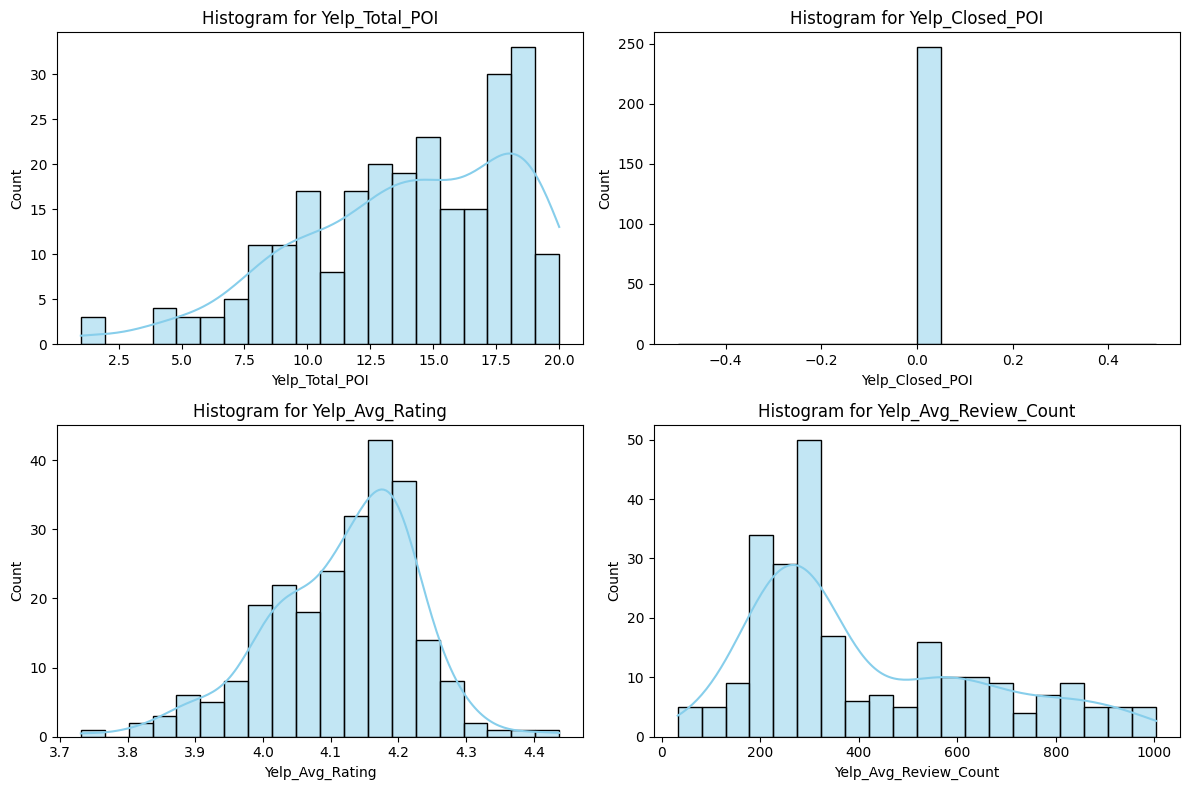

In [24]:
# Distribution of Yelp Data Points

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Example histograms with a line for different columns
columns = ['Yelp_Total_POI','Yelp_Closed_POI','Yelp_Avg_Rating',
'Yelp_Avg_Review_Count']

for i, column in enumerate(columns):
    sns.histplot(complete_df[column].dropna(), kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Histogram for {column}')

# Adjust layout
plt.tight_layout()

plt.savefig(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\Yelp_Data_histograms.png")


# Show the plots
plt.show()

# Total POI is left skewed
# Closed POI has only 0s
# Avg Rating is slightly left skewed
# Avg Review Count is right skewed

# Since the Closed POI has only 0s we will be dropping it. 

complete_df.drop('Yelp_Closed_POI', axis = 1, inplace = True)

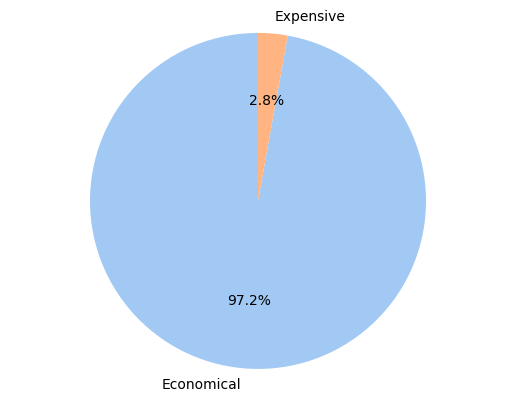

In [25]:
# Visualize the frequency count in price category column

# Get the count of each category
price_category_counts = complete_df['Yelp_Price_Category'].value_counts()

# Create a pie chart with percentage annotations
plt.pie(price_category_counts, labels=price_category_counts.index, 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.savefig(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\Yelp_Price_Category_Piechart.png")


# Display the plot
plt.show()

In [26]:
# NA Imputation in Yelp Data
# There is one record in the dataframe where the records were not found in api response. 
# After viewing the distribution, owing to skewness in data we will be imputing with median values
# In categorical column we will be imputing with the mode of the column


# Calculate median for 'Yelp_Total_POI','Yelp_Avg_Rating','Yelp_Avg_Review_Count'
median_values = complete_df[['Yelp_Total_POI','Yelp_Avg_Rating','Yelp_Avg_Review_Count']].median()

# Calculate mode for col4
mode_value = complete_df['Yelp_Price_Category'].mode().iloc[0]

# # Impute missing values using fillna
complete_df['Yelp_Total_POI'].fillna(median_values['Yelp_Total_POI'], inplace=True)
complete_df['Yelp_Avg_Rating'].fillna(median_values['Yelp_Avg_Rating'], inplace=True)
complete_df['Yelp_Avg_Review_Count'].fillna(median_values['Yelp_Avg_Review_Count'], inplace=True)
complete_df['Yelp_Price_Category'].fillna(mode_value, inplace=True)

In [27]:
# Imputation of NANs in the FSQ fields

complete_df['FSQ_Likely_Open'].fillna(0, inplace=True)
complete_df['FSQ_Very_Likely_Open'].fillna(0, inplace=True)
complete_df['FSQ_Unsure'].fillna(0, inplace=True)

# Check for NANs
complete_df.isna().sum(axis = 0)

City                            0
Country                         0
Station_Id                      0
Station_Name                    0
Latitude                        0
Longitude                       0
Total_Available_Slots           0
Total_Available_Free_Bikes      0
Total_Available_EBikes          0
Total_Available_Normal_Bikes    0
Total_Available_Empty_Slots     0
Date_Time                       0
Date                            0
Time                            0
Total_Bikes_In_Use              0
Yelp_Total_POI                  0
Yelp_Avg_Rating                 0
Yelp_Avg_Review_Count           0
Yelp_Price_Category             0
FSQ_Likely_Open                 0
FSQ_Very_Likely_Open            0
FSQ_Unsure                      0
dtype: int64

In [28]:
# Create New column of Total FSQ POIs
complete_df['FSQ_Total_POI'] = complete_df['FSQ_Likely_Open'] + complete_df['FSQ_Very_Likely_Open'] + complete_df['FSQ_Unsure']

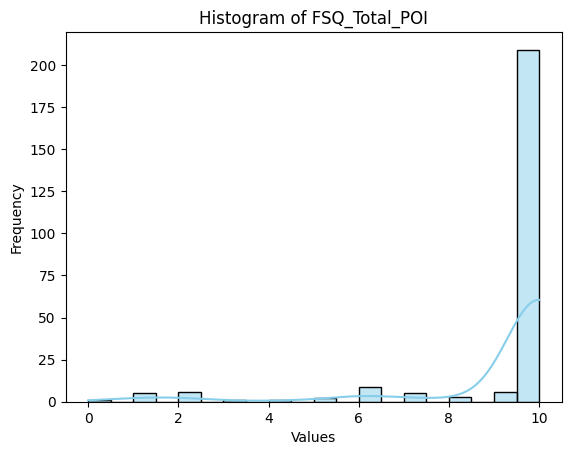

In [30]:
# Frequency Distribution of FSQ POI
complete_df.head(25)
complete_df['FSQ_Total_POI'].value_counts() # We can see that FSQ has not given more than 10 records per lat long whereas in Yelp
# API response the range was much wider 

sns.histplot(complete_df['FSQ_Total_POI'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of FSQ_Total_POI')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.savefig(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\FSQ_Total_POI_histograms.png")

plt.show()

# the distribution is highly right-skewed, majority of values are concentrated around 10

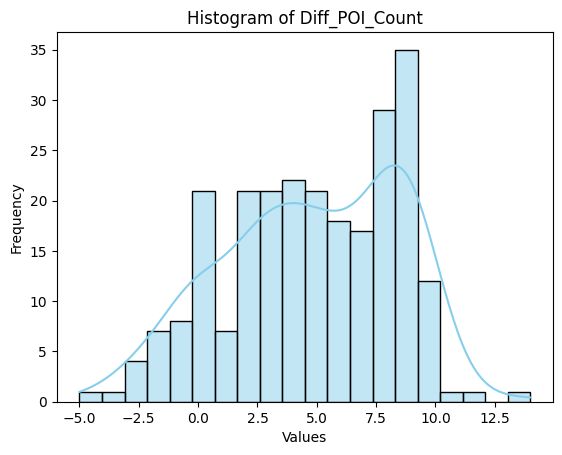

,Yelp_Total_POI,FSQ_Total_POI
count,248.000000,248.000000
mean,14.048387,9.237903
std,4.303007,2.097776
min,1.000000,0.000000
25%,11.000000,10.000000
50%,15.000000,10.000000
75%,18.000000,10.000000
max,20.000000,10.000000


In [31]:
# Check for variance in POI data per Lat Long between FSQ and Yelp data
complete_df['Diff_POI_Count'] = complete_df['Yelp_Total_POI'] - complete_df['FSQ_Total_POI']
sns.histplot(complete_df['Diff_POI_Count'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Diff_POI_Count')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.savefig(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\Yelp_FSQ_Data_POI_Diff_histograms.png")

plt.show()

complete_df[['Yelp_Total_POI', 'FSQ_Total_POI']].describe()



In [32]:
# Yelp data seems to be more complete and thus reliable compared to the FSQ data. 
# Therefore we will be considering a weighted avg of both the data sources - 90% weightage to Yelp and 10% to FSQ

complete_df['Avg_POI_Count'] = 0.9 * complete_df['Yelp_Total_POI'] + 0.1 * complete_df['FSQ_Total_POI']
# Since the sum of weights is 1 we won't be dividing with it.

# Popularity Index

# Specify the number of bins (in this case, 3 for low, medium, and high)
num_bins = 3

# Use qcut to bucket the numerical column into three categories
complete_df['Popularity_Index'] = pd.qcut(complete_df['Avg_POI_Count'], q=num_bins, labels=['Low', 'Medium', 'High'])


# Visualize the bike stations in a geo map

color_scale = {'Low': 'orange', 'Medium': 'yellow', 'High': 'red'}

# Create a numerical representation of 'Popularity_Index'
complete_df['Popularity_Index_Num'] = complete_df['Popularity_Index'].map({'Low': 1, 'Medium': 2, 'High': 3})

fig = px.scatter_mapbox(complete_df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Station_Name", 
                        hover_data=["Station_Name", "Avg_POI_Count"],
                        color="Popularity_Index_Num",
                        color_discrete_map=color_scale,
                        size="Popularity_Index_Num",
                        zoom=8, 
                        height=800,
                        width=800,
                        labels={'Popularity_Index_Num': 'Popularity Index'})  # Title for the legend

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\POI_Popularity_Index_chart.html")
fig.show()
# The further we go from downtown the lesser is the popularity index of the station


c:\Users\aksha\anaconda3\envs\python_3.11.5\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



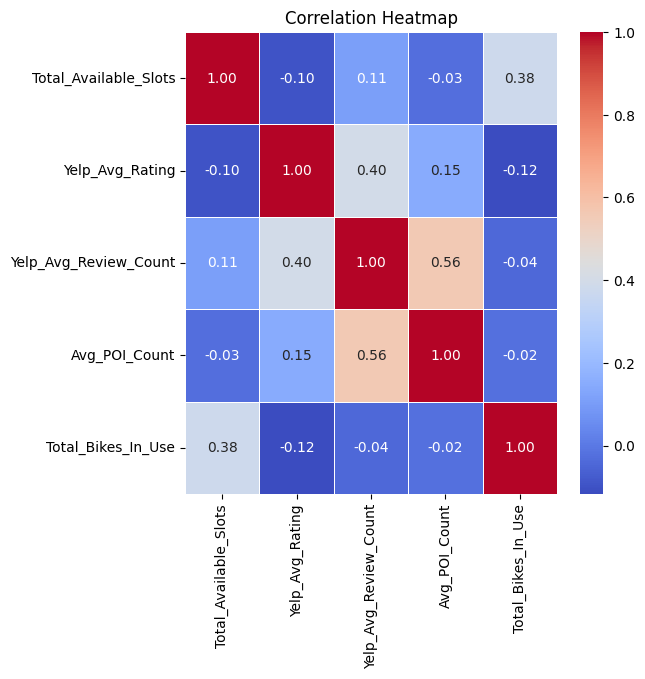

187

In [33]:

# Check for correlation between following parameters -
    # Total Slots and Total POIs
    # Total Bikes in Use and Total POIs
    # Total Bikes in Use and Total number of reviews
    # Total Bikes in Use and Avg Ratings
    
complete_df.columns
# Calculate the correlation matrix
corr_matrix = complete_df[['Total_Available_Slots', 'Yelp_Avg_Rating', 'Yelp_Avg_Review_Count', 'Avg_POI_Count', 'Total_Bikes_In_Use']].corr()

# Create a heatmap 
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.savefig(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\Correlation_Heatmap.png")

plt.show()

# Review count and ratings are highly correlated (0.46)
# Avg POI count and review count are highly correlated (0.58)
# Since one is a subset of another, hence it's obvious that total Bikes in Use and Available slots are mildly correlated (0.33)

# DQ Check 
# Check whether the Empty slots = Total Slots - Total Free Bikes
sum(complete_df['Total_Available_Empty_Slots'] == complete_df['Total_Available_Slots'] - complete_df['Total_Available_Free_Bikes'])
# In 194 records the total available empty slots matches the difference between available slots and available free bikes



Index(['City', 'Country', 'Station_Id', 'Station_Name', 'Latitude',
       'Longitude', 'Total_Available_Slots', 'Total_Available_Free_Bikes',
       'Total_Available_EBikes', 'Total_Available_Normal_Bikes',
       'Total_Available_Empty_Slots', 'Date_Time', 'Date', 'Time',
       'Total_Bikes_In_Use', 'Yelp_Total_POI', 'Yelp_Avg_Rating',
       'Yelp_Avg_Review_Count', 'Yelp_Price_Category', 'FSQ_Likely_Open',
       'FSQ_Very_Likely_Open', 'FSQ_Unsure', 'FSQ_Total_POI', 'Diff_POI_Count',
       'Avg_POI_Count', 'Popularity_Index', 'Popularity_Index_Num'],
      dtype='object')


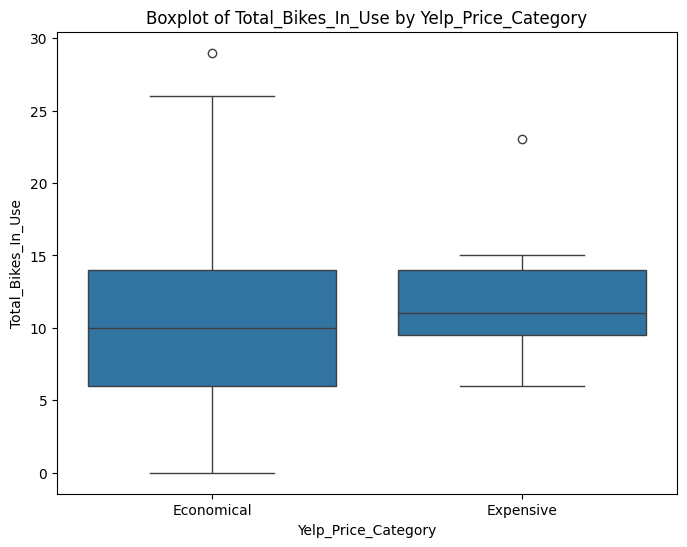

T-Statistic: -1.0406164750182207
P-Value: 0.3362397238749931
No significant difference in means.


In [34]:
print(complete_df.columns)
# Box plot of total bikes in use vs price category

plt.figure(figsize=(8, 6))
sns.boxplot(x='Yelp_Price_Category', y='Total_Bikes_In_Use', data=complete_df)
plt.title('Boxplot of Total_Bikes_In_Use by Yelp_Price_Category')
plt.savefig(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\images\Yelp_Price_Category_Wise_Boxplot.png")

plt.show()

# We can see that the total bikes in use are in higher number within an economical POI compared to an Expensive one
# We will validate the hypothesis using a t test

# T Test (Welch's t test as both the groups have unequal sample sizes) 

# Separate data into two groups
economical_category = complete_df['Total_Bikes_In_Use'][complete_df['Yelp_Price_Category'] == 'Economical']
expensive_category = complete_df['Total_Bikes_In_Use'][complete_df['Yelp_Price_Category'] == 'Expensive']

# Perform Welch's t-test
t_statistic, p_value = ttest_ind(economical_category, expensive_category, equal_var=False)

# Print the t-test result
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Check the p-value to determine statistical significance
if p_value < 0.05:
    print("The means are significantly different.")
else:
    print("No significant difference in means.")

# We cannot reject the null hypothesis


In [5]:
complete_df = pd.to_csv(r"C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\data\Merged_Data_17th.csv", index = False)


,City,Country,Station_Id,Station_Name,Latitude,Longitude,Total_Available_Slots,Total_Available_Free_Bikes,Total_Available_EBikes,Total_Available_Normal_Bikes,...,Yelp_Avg_Review_Count,Yelp_Price_Category,FSQ_Likely_Open,FSQ_Very_Likely_Open,FSQ_Unsure,FSQ_Total_POI,Diff_POI_Count,Avg_POI_Count,Popularity_Index,Popularity_Index_Num
0,Vancouver,CA,7a19c49f486d7c0c02b3685d7b240448,10th & Cambie,49.262487,-123.114397,36,29,1,28,...,253.666667,Economical,4.0,6.0,0.0,10.0,5.0,14.5,Medium,2
1,Vancouver,CA,32603a87cfca71d0f7dfa3513bad69d5,Yaletown-Roundhouse Station,49.274566,-123.121817,16,12,4,8,...,673.555556,Economical,1.0,9.0,0.0,10.0,8.0,17.2,High,3
2,Vancouver,CA,6d42fa40360f9a6b2bf641c7b8bb2862,Dunsmuir & Beatty,49.279764,-123.110154,26,18,3,15,...,881.947368,Economical,0.0,10.0,0.0,10.0,9.0,18.1,High,3
3,Vancouver,CA,66f873d641d448bd1572ab086665a458,12th & Yukon near City Hall,49.260599,-123.113504,16,8,5,3,...,286.857143,Economical,3.0,7.0,0.0,10.0,4.0,13.6,Medium,2
4,Vancouver,CA,485d4d24c803cfde829ab89699fed833,8th & Ash,49.264215,-123.117772,16,11,7,4,...,290.166667,Economical,5.0,5.0,0.0,10.0,2.0,11.8,Low,1


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [36]:
# Create a SQLite database 
db_path = r'C:\Users\aksha\Documents\LHL\LHL Assignments\Week 5\Python Statistical Modeling Project\Python Project\Statistical_Modeling_Python\data\bike_station.db'
conn = sqlite3.connect(db_path)

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Create a table
create_table_query = '''
    CREATE TABLE IF NOT EXISTS bike_station_data (
        City TEXT NOT NULL,
        Country TEXT NOT NULL,
        Station_Id TEXT NOT NULL,
        Station_Name TEXT NOT NULL,
        Latitude REAL NOT NULL,
        Longitude REAL NOT NULL,
        Total_Available_Slots INTEGER NOT NULL,
        Total_Available_Free_Bikes INTEGER NOT NULL,
        Total_Available_EBikes INTEGER NOT NULL,
        Total_Available_Normal_Bikes INTEGER NOT NULL,
        Total_Available_Empty_Slots INTEGER NOT NULL,
        Date_Time TIMESTAMP NOT NULL,
        Total_Bikes_In_Use INTEGER NOT NULL,
        Yelp_Total_POI REAL NOT NULL,
        Yelp_Avg_Rating REAL NOT NULL,
        Yelp_Avg_Review_Count REAL NOT NULL,
        Yelp_Price_Category TEXT NOT NULL,
        FSQ_Likely_Open REAL NOT NULL,
        FSQ_Very_Likely_Open REAL NOT NULL,
        FSQ_Unsure REAL NOT NULL,
        FSQ_Total_POI REAL NOT NULL,
        Diff_POI_Count REAL NOT NULL,
        Avg_POI_Count REAL NOT NULL,
        Popularity_Index TEXT NOT NULL,
        Popularity_Index_Num TEXT NOT NULL
    );
'''
cursor.execute(create_table_query)

# Commit the changes
conn.commit()

# Push the DataFrame into the table
complete_df.to_sql('bike_station_data', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

# Create an SQLite database (this will create the database file if it doesn't exist)
conn = sqlite3.connect(db_path)

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Perform a SELECT * query
select_query = 'SELECT * FROM bike_station_data limit 5'
result_df = pd.read_sql(select_query, conn)

# Print the result DataFrame
print(result_df)

        City Country                        Station_Id  \
0  Vancouver      CA  7a19c49f486d7c0c02b3685d7b240448   
1  Vancouver      CA  32603a87cfca71d0f7dfa3513bad69d5   
2  Vancouver      CA  6d42fa40360f9a6b2bf641c7b8bb2862   
3  Vancouver      CA  66f873d641d448bd1572ab086665a458   
4  Vancouver      CA  485d4d24c803cfde829ab89699fed833   

                  Station_Name   Latitude   Longitude  Total_Available_Slots  \
0                10th & Cambie  49.262487 -123.114397                     36   
1  Yaletown-Roundhouse Station  49.274566 -123.121817                     16   
2            Dunsmuir & Beatty  49.279764 -123.110154                     26   
3  12th & Yukon near City Hall  49.260599 -123.113504                     16   
4                    8th & Ash  49.264215 -123.117772                     16   

   Total_Available_Free_Bikes  Total_Available_EBikes  \
0                          29                       1   
1                          12                       4   

Look at the data before and after the join to validate your data.

In [37]:

print(complete_df.shape[0] == city_bike_df.shape[0])
# Yes it's matching

True
